### Task 1: EDA: Data Preprocessing 

1. Adding necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2. Data Preprocessing steps

In [4]:
df = pd.read_csv("../data/complaints.csv")

C:\Users\betsi\AppData\Local\Temp\ipykernel_8860\2444713710.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/complaints.csv")


In [11]:
df.tail(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
9609787,2022-08-19,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"Despite multiple written requests, the unverif...",NaN,"EQUIFAX, INC.",MO,63121,NaN,Consent provided,Web,2022-08-19,Closed with explanation,Yes,NaN,5891605
9609788,2022-06-21,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NJ,08234,NaN,Consent not provided,Web,2022-06-21,Closed with explanation,Yes,NaN,5689405
9609789,2022-08-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",MA,02451,NaN,Consent not provided,Web,2022-08-19,Closed with explanation,Yes,NaN,5891612
9609790,2019-02-16,Mortgage,Other type of mortgage,Closing on a mortgage,NaN,XX/XX/XXXX applied and approved for va refinan...,NaN,"LoanUnited.com, LLC",WA,98444,Servicemember,Consent provided,Web,2019-03-20,Closed with explanation,Yes,NaN,3153948
9609791,2016-01-19,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,JPMORGAN CHASE & CO.,TX,76002,NaN,Consent not provided,Web,2016-01-19,Closed with explanation,Yes,No,1748209
9609792,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
9609793,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
9609794,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
9609795,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118
9609796,2014-11-10,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",CA,95616,NaN,NaN,Postal mail,2014-11-25,Closed with explanation,Yes,No,1110751


In [19]:
len(df), df.shape, (df['Consumer complaint narrative'].isnull().sum()), df['Consumer complaint narrative'].notnull().sum()


(9609797, (9609797, 18), np.int64(6629041), np.int64(2980756))

In [24]:
missing_narratives = df['Consumer complaint narrative'].isna().sum()
print(f"Missing narratives: {missing_narratives}")

Missing narratives: 6629041


<Axes: title={'center': 'Complaints per Product Category'}, ylabel='Product'>

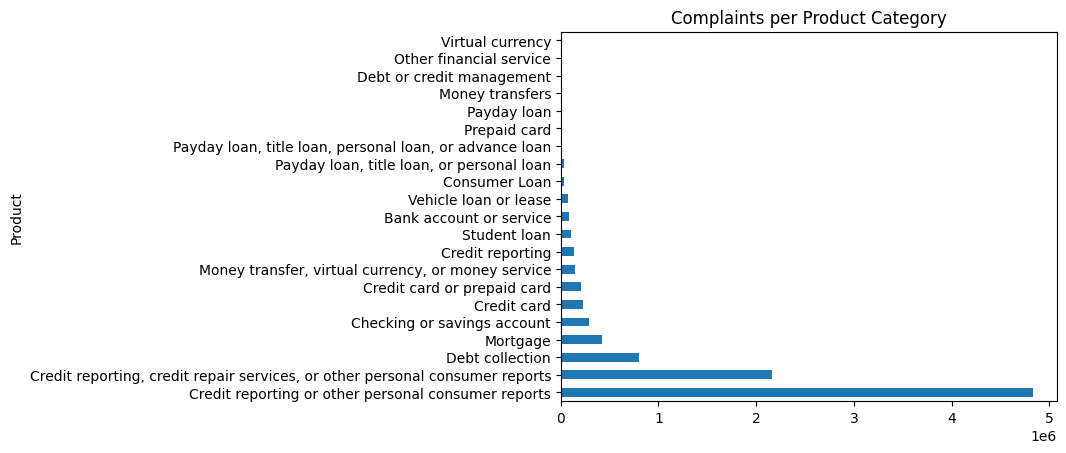

In [14]:
df['Product'].value_counts().plot(kind='barh', title='Complaints per Product Category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [27]:
df.describe(include='all')  # Include object-type columns

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299,9.609797e+06
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092744e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774842e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.038016e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.448508e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129591e+07


Count and visualize complaints per product

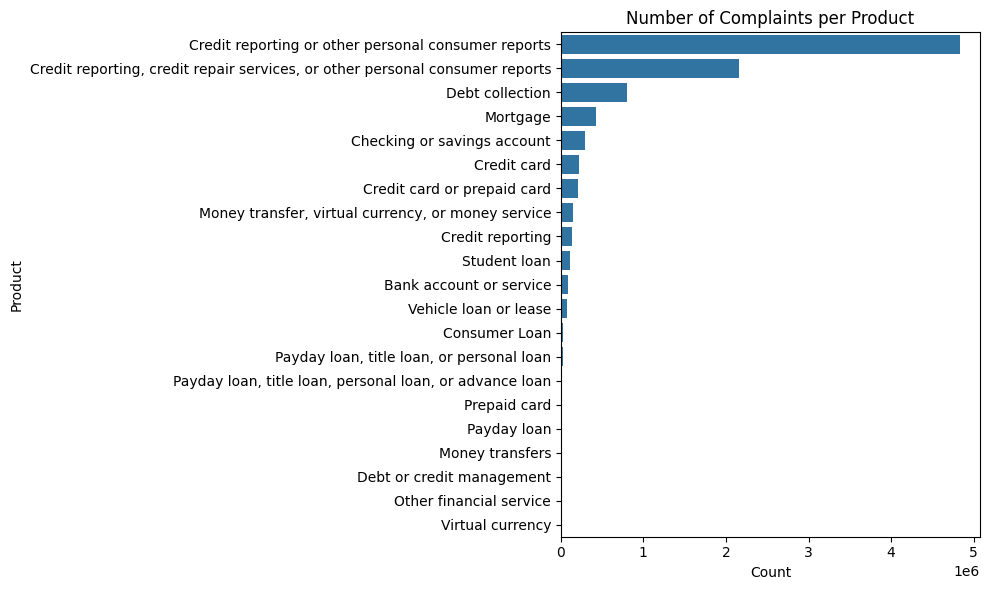

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

product_counts = df['Product'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=product_counts.index, x=product_counts.values)
plt.title("Number of Complaints per Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


Narrative length analysis

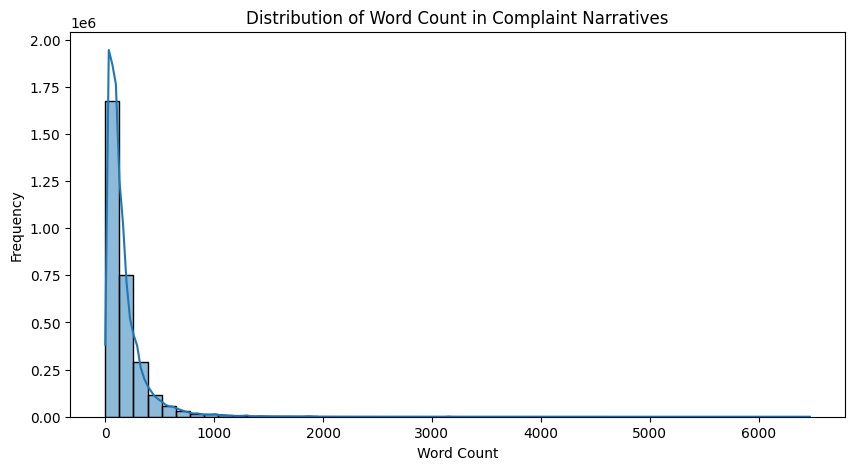

count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: word_count, dtype: float64

In [29]:
# Only non-null narratives
df_with_narrative = df[df['Consumer complaint narrative'].notnull()].copy()
df_with_narrative['word_count'] = df_with_narrative['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

# Visualize word count
plt.figure(figsize=(10, 5))
sns.histplot(df_with_narrative['word_count'], bins=50, kde=True)
plt.title("Distribution of Word Count in Complaint Narratives")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Summary stats
df_with_narrative['word_count'].describe()


Complaints with and without narrative

In [30]:
total = len(df)
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"Total complaints: {total}")
print(f"With narratives: {with_narrative}")
print(f"Without narratives: {without_narrative}")


Total complaints: 9609797
With narratives: 2980756
Without narratives: 6629041


In [31]:
df['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Debt collection', 'Credit card', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Debt or credit management', 'Mortgage',
       'Payday loan, title loan, personal loan, or advance loan',
       'Prepaid card', 'Student loan', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Money transfers', 'Consumer Loan',
       'Payday loan', 'Other financial service', 'Virtual currency'],
      dtype=object)

## Step: Filter for Relevant Product Categories

The project focuses on analyzing complaints across five key product categories:

- Credit card
- Personal loan
- Buy Now, Pay Later (BNPL)
- Savings account
- Money transfers

However, the dataset uses inconsistent product names. Therefore, we define a mapping to group related products under the target categories.


In [36]:
# Define mapping from actual dataset labels to simplified target categories
product_mapping = {
    'Credit card': 'Credit card',
    'Credit card or prepaid card': 'Credit card',
    
    'Payday loan, title loan, or personal loan': 'Personal loan',
    'Payday loan, title loan, personal loan, or advance loan': 'Personal loan',
    'Consumer Loan': 'Personal loan',
    
    # No explicit BNPL product in CFPB data, so we use 'Virtual currency' as a loose proxy if allowed
    'Virtual currency': 'Buy Now, Pay Later',  
    
    'Checking or savings account': 'Savings account',
    'Bank account or service': 'Savings account',
    
    'Money transfers': 'Money transfers',
    'Money transfer, virtual currency, or money service': 'Money transfers'
}

# Filter rows where the Product is in our defined mapping
df_filtered = df[df['Product'].isin(product_mapping.keys())].copy()

# Apply the mapping to create a new column with grouped category names
df_filtered['Mapped Product'] = df_filtered['Product'].map(product_mapping)

# Filter out rows with missing complaint narratives
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]


### Observation

After applying the product mapping and filtering out empty narratives, the dataset is narrowed down to the five core financial products relevant to the project. Below is the distribution:


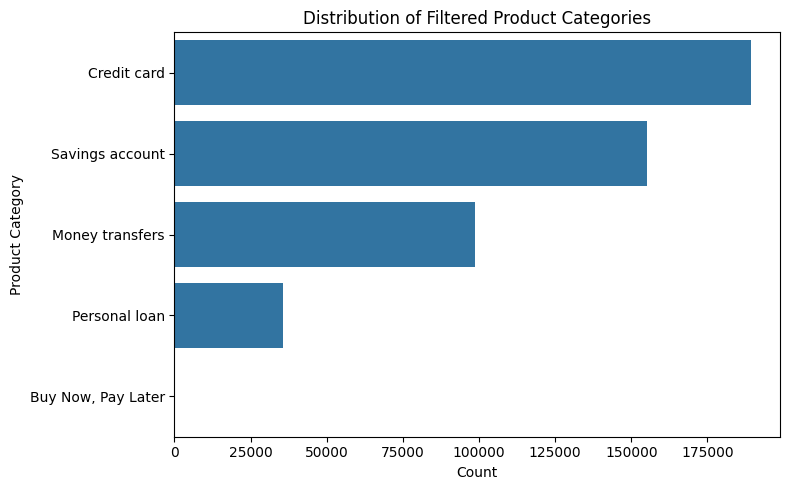

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(y=df_filtered['Mapped Product'], order=df_filtered['Mapped Product'].value_counts().index)
plt.title("Distribution of Filtered Product Categories")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


## Step: Clean the Complaint Narratives

To improve the quality of the text embeddings, we clean the complaint narratives by:
- Lowercasing the text
- Removing special characters and punctuation
- Removing extra whitespace
- (Optionally) removing boilerplate phrases (e.g., "I am writing to file a complaint")

This helps reduce noise in the vector representations.


In [38]:
import re

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove non-alphanumeric characters (keep spaces)
    text = re.sub(r"[^a-z0-9\s]", "", text)
    # Collapse multiple spaces into one
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply the cleaning function to a new column
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


In [39]:
df_filtered[['Consumer complaint narrative', 'cleaned_narrative']].sample(5)


,Consumer complaint narrative,cleaned_narrative
2014038,I would like a full investigation in what is t...,i would like a full investigation in what is t...
4919394,Coinbase has disabled my account. Support is n...,coinbase has disabled my account support is no...
5802102,"On XX/XX/2018, I began the process of applying...",on xxxx2018 i began the process of applying fo...
9381729,I purchased a vanilla prepaid Visa card at XXX...,i purchased a vanilla prepaid visa card at xxx...
862361,I am writing to file a complaint against Navy ...,i am writing to file a complaint against navy ...


## Step: Save Cleaned Dataset

We save the cleaned and filtered data as `filtered_complaints.csv` in the `data/` folder. This will be the input for chunking and embedding in Task 2.


In [40]:
# Save to CSV
df_filtered.to_csv("../data/filtered_complaints.csv", index=False)
print("Filtered dataset saved to data/filtered_complaints.csv")


Filtered dataset saved to data/filtered_complaints.csv


In [41]:
print(f"Final record count: {len(df_filtered)}")

Final record count: 478834
